In [16]:
import pandas as pd

In [17]:
df1 = pd.read_excel('datasets/Aracaju.xlsx', sheet_name='Planilha1')
df2 = pd.read_excel('datasets/Fortaleza.xlsx', sheet_name='Planilha1')
df3 = pd.read_excel('datasets/Natal.xlsx', sheet_name='Planilha1')
df4 = pd.read_excel('datasets/Recife.xlsx', sheet_name='Planilha1')
df5 = pd.read_excel('datasets/Salvador.xlsx', sheet_name='Planilha1')

In [18]:
df = pd.concat([df1,df2,df3,df4,df5])

In [19]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [20]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [21]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
4,Salvador,2019-02-14,19.47,1037,3
198,Natal,2019-01-02,13.65,1037,3
194,Salvador,2019-01-02,156.47,1035,1
112,Natal,2019-01-02,43.00,1036,3
135,Natal,2019-01-02,9.95,1037,3
26,Fortaleza,2019-01-01,18.93,1005,2
101,Salvador,2019-01-01,32.28,1035,3
51,Aracaju,2018-01-01,40.58,1522,6
177,Salvador,2019-01-02,41.19,1037,2
62,Salvador,2019-01-01,161.02,1037,3


In [22]:
print(f'Esse dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

Esse dataset possui 894 linhas e 5 colunas.


In [23]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [24]:
# Alterando o tipo de dado de cada coluna
df['LojaID'] = df['LojaID'].astype('object')

In [25]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

#### Trantando valores faltantes

In [27]:
df['Vendas'].mean()

122.61180089485458

In [10]:
# Contando valores nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [11]:
# Substituindo os valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [12]:
# Substituindo os nulos por zero
df['Vendas'].fillna(0, inplace=True)

In [13]:
# Apagando as linhas com valores nulos
df.dropna(inplace=True)

#### Adicionando novas colunas

In [29]:
# Criando a coluna receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [ ]:
# Criar coluna de produtos vendidos - exemplo
df['Receita/Vendas'] = df['Receita'] / df['Vendas']

In [30]:
# Retornando a maior receita
df['Receita'].max()

3544.0

In [31]:
# Retornando a menor receita
df['Receita'].min()

3.34

In [34]:
# Top 3 receitas (maiores vendas) - nlargest
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [35]:
# Piores receitas - nsamllest
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [36]:
# Agrupamento por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [37]:
# Ordenando o conjunto de dados
df.sort_values('Receita', ascending=False).head(8)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0


#### Trabalhando com datas

In [38]:
# Transformando a coluna de data em tipo inteiro
df['Data'] = df['Data'].astype('int64')

In [39]:
# Verificando o tipo de dado de cada coluna
df.dtypes    

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [40]:
# Transformando coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])

In [41]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [43]:
# Agrupamento por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [44]:
# Criando uma nova coluna com o ano
df['Ano_Venda'] = df['Data'].dt.year

In [45]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
34,Salvador,2019-01-01,36.54,1037,3,109.62,2019
138,Fortaleza,2019-03-02,150.38,983,6,902.28,2019
2,Recife,2019-02-10,12.94,983,5,64.70,2019
47,Salvador,2019-01-01,190.03,1036,2,380.06,2019
146,Natal,2019-01-02,149.88,1037,1,149.88,2019
130,Fortaleza,2019-03-02,12.36,983,4,49.44,2019
138,Recife,2019-03-02,150.38,983,6,902.28,2019
164,Salvador,2019-01-02,6.59,1035,1,6.59,2019
68,Recife,2019-01-01,175.45,980,3,526.35,2019
72,Aracaju,2018-01-01,168.95,1523,7,1182.65,2018


In [46]:
# Extraindo o mes e o dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [47]:
df.sample(8)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
80,Natal,2018-05-23,264.00,852,3,792.00,2018,5,23
60,Aracaju,2018-01-01,215.88,1521,3,647.64,2018,1,1
103,Salvador,2019-01-01,191.60,1034,1,191.60,2019,1,1
223,Natal,2019-01-02,40.51,1037,2,81.02,2019,1,2
1,Salvador,2018-01-01,19.02,1034,3,57.06,2018,1,1
77,Recife,2019-01-01,102.82,981,6,616.92,2019,1,1
97,Fortaleza,2019-01-01,139.70,1003,4,558.80,2019,1,1
57,Aracaju,2018-01-01,23.49,1520,7,164.43,2018,1,1


In [48]:
# Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [53]:
# Calculando a diferença de dias
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [54]:
df.sample(8)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre
63,Recife,2019-01-01,37.95,980,2,75.90,2019,1,1,365 days,1
95,Salvador,2019-01-01,5.13,1035,1,5.13,2019,1,1,365 days,1
232,Salvador,2019-01-03,167.76,1034,3,503.28,2019,1,3,367 days,1
21,Salvador,2019-01-01,39.72,1035,3,119.16,2019,1,1,365 days,1
178,Salvador,2019-01-02,39.28,1037,3,117.84,2019,1,2,366 days,1
101,Fortaleza,2019-01-01,11.67,1005,4,46.68,2019,1,1,365 days,1
2,Recife,2019-02-10,12.94,983,5,64.70,2019,2,10,405 days,1
144,Natal,2019-01-02,23.38,1034,1,23.38,2019,1,2,366 days,1


In [51]:
# Criando a coluna de trimestre
df['semestre'] = df['Data'].dt.quarter

In [55]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre
22,Aracaju,2018-01-01,150.94,1522,1,150.94,2018,1,1,0 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,2019,1,1,365 days,1
12,Natal,2019-02-02,709.00,853,3,2127.00,2019,2,2,397 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days,1
120,Fortaleza,2019-03-02,184.90,982,4,739.60,2019,3,2,425 days,1


In [58]:
# Filtrando as vendas de 2019 do mes de marco
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [59]:
vendas_marco_19.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre
130,Fortaleza,2019-03-02,12.36,983,4,49.44,2019,3,2,425 days,1
126,Recife,2019-03-02,41.87,980,8,334.96,2019,3,2,425 days,1
127,Fortaleza,2019-03-02,39.56,982,8,316.48,2019,3,2,425 days,1
116,Salvador,2019-03-02,41.78,1034,3,125.34,2019,3,2,425 days,1
114,Recife,2019-03-02,16.82,983,4,67.28,2019,3,2,425 days,1


#### Visualização de dados

In [65]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

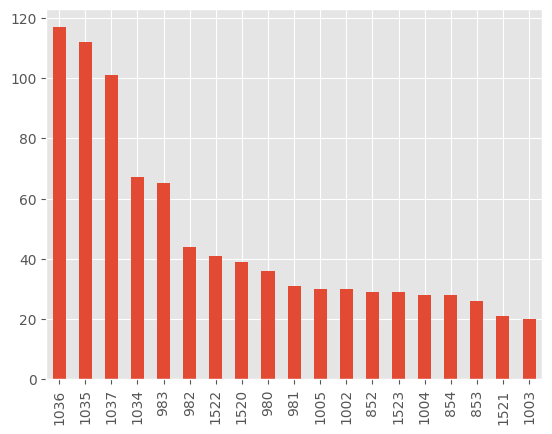

In [89]:
# Grafico de barras
df['LojaID'].value_counts(ascending=False).plot.bar();

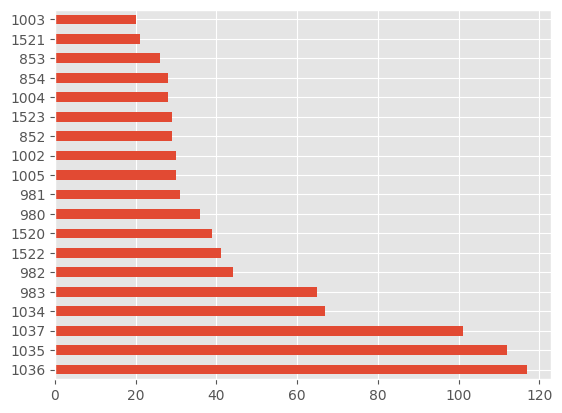

In [88]:
# Grafico de barras horizontais
df['LojaID'].value_counts(ascending=False).plot.barh();

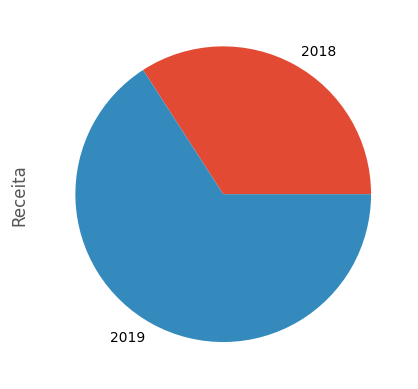

In [87]:
# Grafico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [64]:
# Total vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

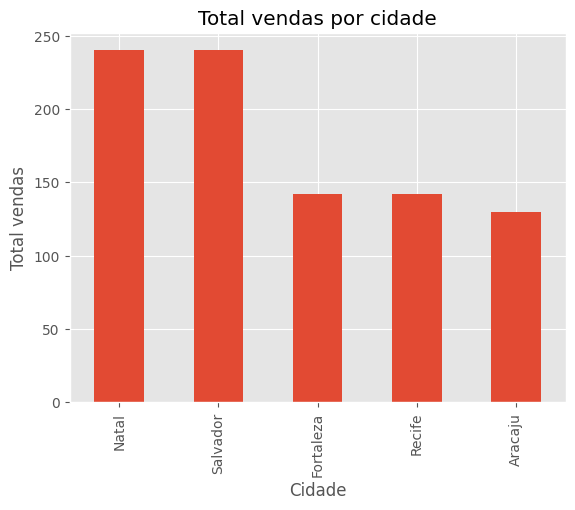

In [86]:
# Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

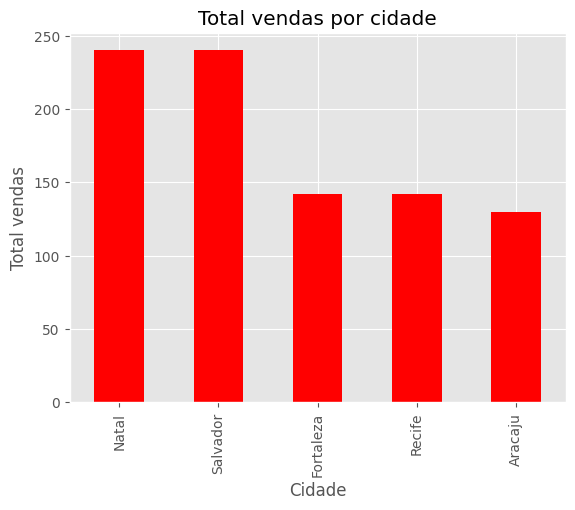

In [85]:
# Alterando a cor
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

In [69]:
# Alterando o estilo dos graficos
plt.style.use('ggplot')

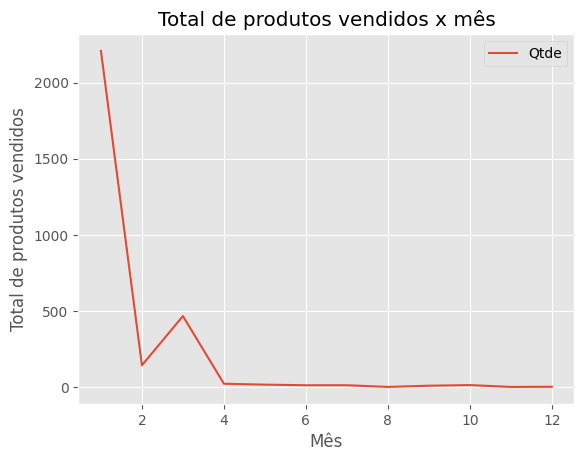

In [84]:
# Grafico de linhas
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title='Total de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend();

In [73]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [74]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

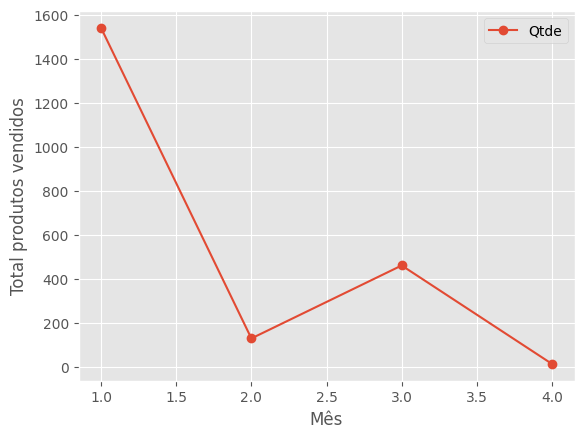

In [82]:
# Total produtos vendidos por mes
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='o')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend();

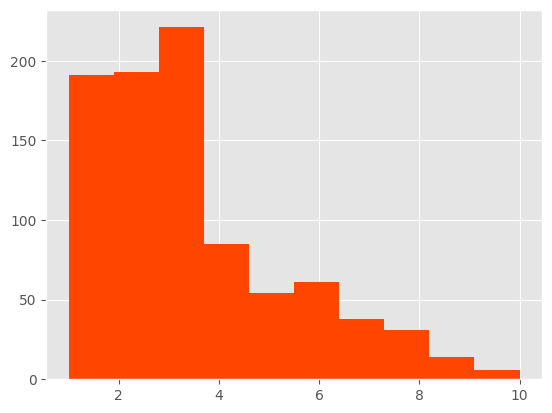

In [81]:
# Grafico de histograma
plt.hist(df['Qtde'], color='orangered');

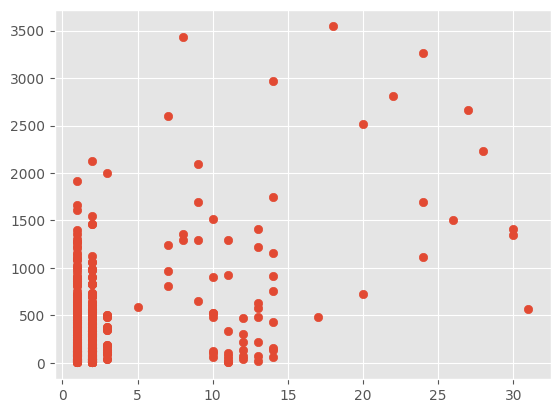

In [80]:
plt.scatter(x=df_2019['dia_venda'], y=df_2019['Receita']);

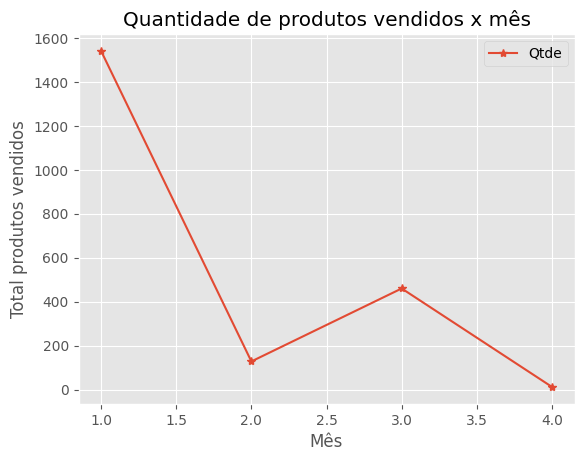

In [90]:
# Salvando em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='*')
plt.title('Quantidade de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend();
plt.savefig('grafico_qtde_mes.png')